<a href="https://colab.research.google.com/github/devarshi167/Suicide-detection111/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# Step 1:  Imports

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
!pip install watermark
!pip install textstat
import textstat
import re
import string

#%load_ext watermark
from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.0 MB/s eta 0:00:00


# Step 2:  Load the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SUICIDE DETECTION/Suicide_Detection.csv')

In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


# Step 3:  Explore the Categories

In [ ]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [ ]:
n_postings = len(df)
print("Number of posts: {:d}".format(n_postings))

Number of posts: 232074


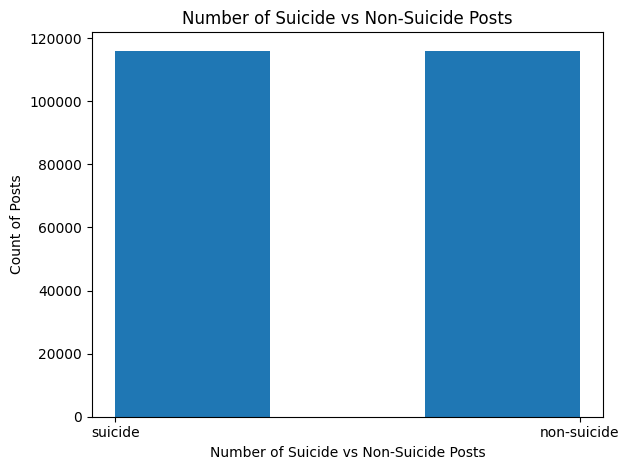

In [ ]:
plt.hist(df['class'], bins=3);
plt.xlabel('Number of Suicide vs Non-Suicide Posts')
plt.ylabel('Count of Posts')
plt.title('Number of Suicide vs Non-Suicide Posts')

plt.tight_layout()
plt.savefig('Balanced_Data_Set.png')

We have a total of 232,074 posts with an equal number from each category. This is an extremely balanced data set.

# Step 4:  Length of Posts

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.rename(columns={'text': 'clean_text'}, inplace=True)

In [ ]:
df['clean_text'].apply(len).min()

3

In [ ]:
df['clean_text'].apply(len).max()

40297

In [ ]:
post_length = df['clean_text'].apply(len).mean()
print("Average Post Length: " + str(post_length))

suicide_length = df['clean_text'][df['class'] == 'suicide'].apply(len).mean()
print("Average length of post in suicide forum: " + str(suicide_length))

non_suicide_length = df['clean_text'][df['class'] != 'suicide'].apply(len).mean()
print("Average length of post in teenage forum: " + str(non_suicide_length))

Average Post Length: 689.6397356015754
Average length of post in suicide forum: 1050.0606272137336
Average length of post in teenage forum: 329.21884398941717


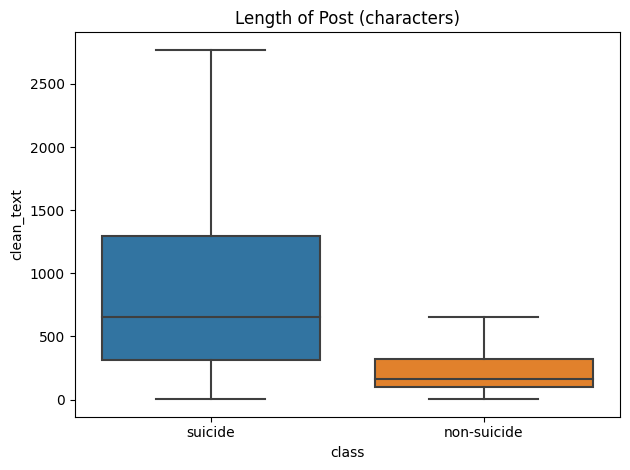

In [ ]:
len_text = df['clean_text'].apply(len)
sns.boxplot(x=df['class'],y=len_text, showfliers = False).set_title("Length of Post (characters)")
plt.tight_layout()
plt.savefig('Length_of_post.png')

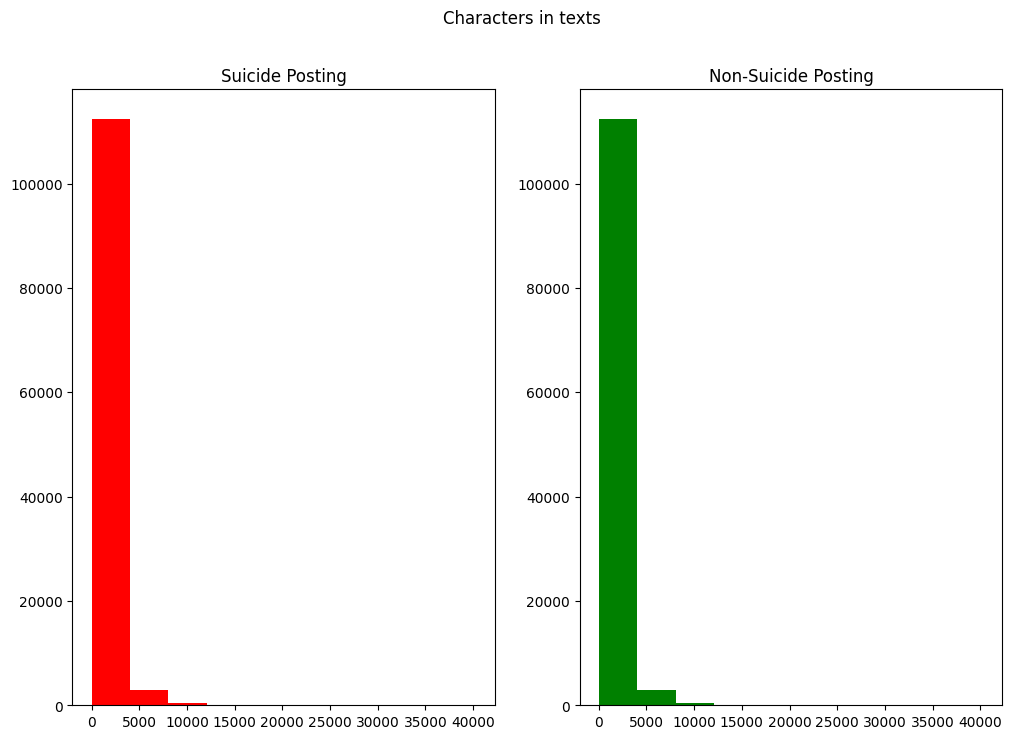

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Suicide Posting')
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Characters in texts')
plt.show()

In [ ]:
import scipy.stats as stats
stats.ttest_ind(df['clean_text'][df['class'] == 'suicide'].apply(len), df['clean_text'][df['class'] != 'suicide'].apply(len))

Ttest_indResult(statistic=158.02719515061347, pvalue=0.0)

The average length of the posts in the suicide forum are much longer than the average length of posts in the teenager forum.  A t-test confirms the differences are statistically different.  Therefore we will go ahead and add a column to our dataframe to indicate the length of the post.  

In [ ]:
df['length'] = ''

In [ ]:
for i in range(len(df)):
    length = len(df['clean_text'].iloc[i])
    df['length'].iloc[i] = length

In [ ]:
df.head()

,Unnamed: 0,clean_text,class,length
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715
1,3,Am I weird I don't get affected by compliments...,non-suicide,138
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129
3,8,i need helpjust help me im crying so hard,suicide,41
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426


# Step 5:  Sentiment Analysis

In [ ]:
from textblob import TextBlob

text = 'I really like it here at camp. All the councelors are great and I am making some friends.  All the boys are hot and the facilities are great.  I love it here.  However, the food is terrible'

blob_text = TextBlob(text)
polarity = blob_text.polarity
print(polarity)

0.2583333333333333


In [ ]:
### insert column to collect sentiment analysis
df['sentiment'] = ''

In [ ]:
for i in range(len(df)):
    df['sentiment'].iloc[i] = TextBlob(df['clean_text'].iloc[i]).polarity

In [ ]:
df['sentiment'].isna().sum()

0

In [ ]:
df.head()

,Unnamed: 0,clean_text,class,length,sentiment
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715,0.071429
1,3,Am I weird I don't get affected by compliments...,non-suicide,138,0.1
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129,-0.525
3,8,i need helpjust help me im crying so hard,suicide,41,-0.245833
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426,-0.12841


In [ ]:
suicide_sentiment = df['sentiment'][df['class'] == 'suicide'].mean()
non_suicide_sentiment = df['sentiment'][df['class'] != 'suicide'].mean()

In [ ]:
print('average sentiment of post in suicide forum: ' + str(suicide_sentiment))
print('average sentiment of post in teenage forum: ' + str(non_suicide_sentiment))

average sentiment of post in suicide forum: -0.005237030470277669
average sentiment of post in teenage forum: 0.04403460493667552


In [ ]:
df_suicide = df[df['class'] == 'suicide']
df_suicide['sentiment'] = pd.to_numeric(df_suicide['sentiment'])
df_non_suicide = df[df['class'] != 'suicide']
df_non_suicide['sentiment'] = pd.to_numeric(df_non_suicide['sentiment'])


Apparently the difference between these two groups is also statistically significant.

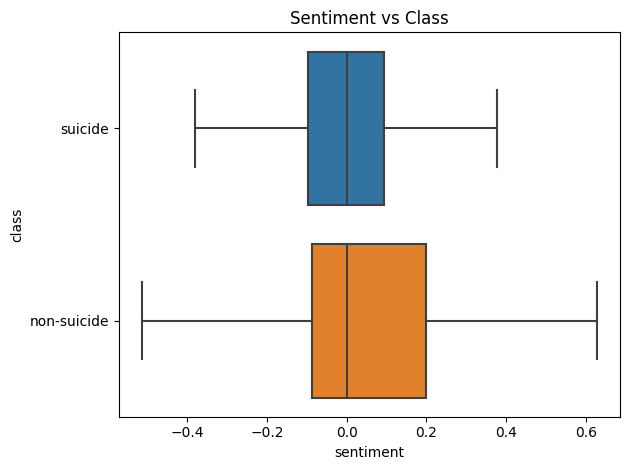

In [ ]:
sns.boxplot(x = 'sentiment', y = 'class', data = df, showfliers = False)
plt.title('Sentiment vs Class')


plt.tight_layout()
plt.savefig('Sentiment_v_class.png')

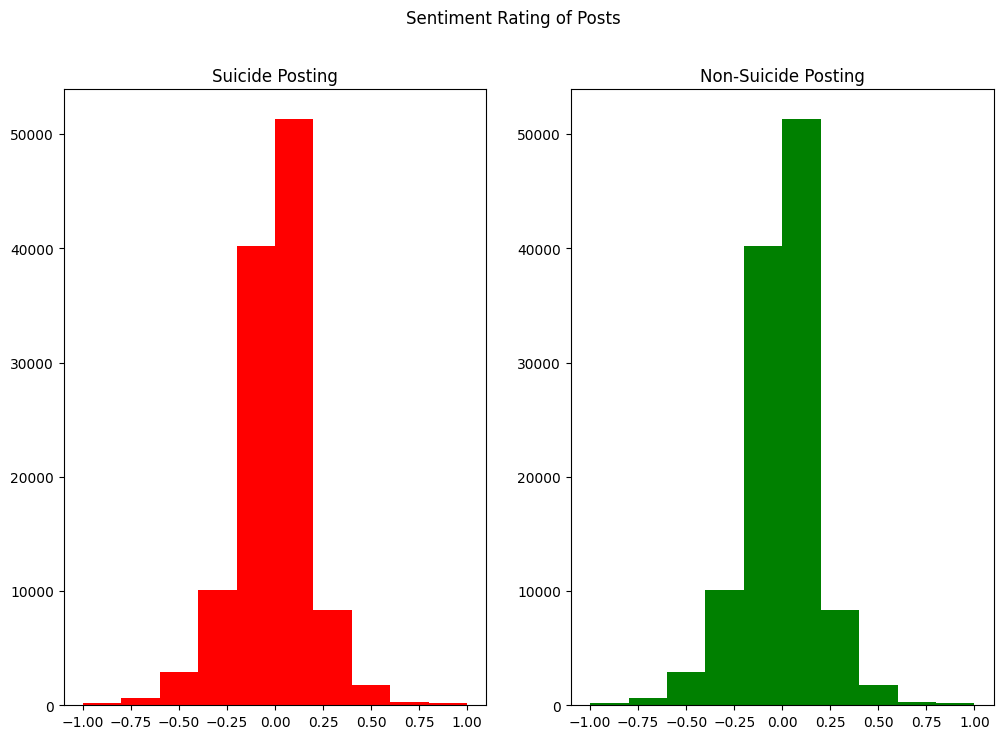

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_sent=df[df['class']=='suicide']['sentiment']
ax1.hist(text_sent,color='red')
ax1.set_title('Suicide Posting')
text_sent=df[df['class']=='suicide']['sentiment']
ax2.hist(text_sent,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Sentiment Rating of Posts')
plt.show()

# Step 6: Look at Reading Level

In [ ]:
df_non_suicide = df[df['class'] != 'suicide']

In [ ]:
df_suicide = df[df['class'] == 'suicide']

In [ ]:
lista = []
for iter in range(len(df_non_suicide)):
    lista.append(textstat.flesch_kincaid_grade(df_non_suicide['clean_text'].iloc[iter]))

print(np.mean(lista))

8.676783267406087


In [ ]:
listb = []
for iter in range(len(df_non_suicide)):
    listb.append(textstat.flesch_kincaid_grade(df_suicide['clean_text'].iloc[iter]))

print(np.mean(listb))

6.7023768280807


In [ ]:
stats.ttest_ind(lista, listb)

Ttest_indResult(statistic=7.141947736246602, pvalue=9.228586856685347e-13)

Interesting.  The mean Flesch Kincaid Grade for postings in the 'suicide' forum are higher than the Grade for postings in the 'teenage' forum.  The difference is statistically significant according to the t-test.  We will go ahead and include a column for Flesch_Kincaid 

In [ ]:
df['flesch_kincaid'] = ''

In [ ]:
for i in range(len(df)):
    df['flesch_kincaid'].iloc[i] = textstat.flesch_kincaid_grade(df['clean_text'].iloc[i])

In [ ]:
df.head()

,Unnamed: 0,clean_text,class,length,sentiment,flesch_kincaid
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715,0.071429,7.7
1,3,Am I weird I don't get affected by compliments...,non-suicide,138,0.1,11.5
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129,-0.525,3.1
3,8,i need helpjust help me im crying so hard,suicide,41,-0.245833,0.9
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426,-0.12841,8.6


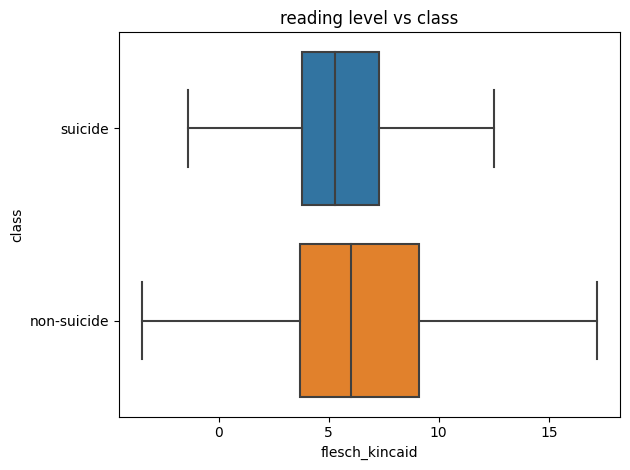

In [ ]:
sns.boxplot(x = 'flesch_kincaid', y = 'class', data = df, showfliers=False)
plt.title('reading level vs class')

plt.tight_layout()
plt.savefig('Reading_Level_v_class.png')

# Step 7:  Look at Repetition

Sometimes writers will use repeated words for emphasis.  A mad mad mad mad world has more emphasis than a mad world.

In [ ]:
df['repetition'] = ''

In [ ]:
for item in range(len(df)):

    words = df['clean_text'].iloc[item].split(" ")  
   
    
    count = 0; 
    for i in range(len(words)-1):  
        if words[i] == words[i+1]:
            count = count + 1

    df['repetition'].iloc[item] = count

In [ ]:
df.head(4)

,Unnamed: 0,clean_text,class,length,sentiment,flesch_kincaid,repetition
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715,0.071429,7.7,0
1,3,Am I weird I don't get affected by compliments...,non-suicide,138,0.1,11.5,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129,-0.525,3.1,0
3,8,i need helpjust help me im crying so hard,suicide,41,-0.245833,0.9,0


In [ ]:
print(df['repetition'][df['class'] == 'suicide'].std())
print(df['repetition'][df['class'] != 'suicide'].std())

7.270165311934155
68.24389332896193


In [ ]:
print(df['repetition'][df['class'] == 'suicide'].mean())
print(df['repetition'][df['class'] != 'suicide'].mean())

0.27880762170686935
2.07011556658652


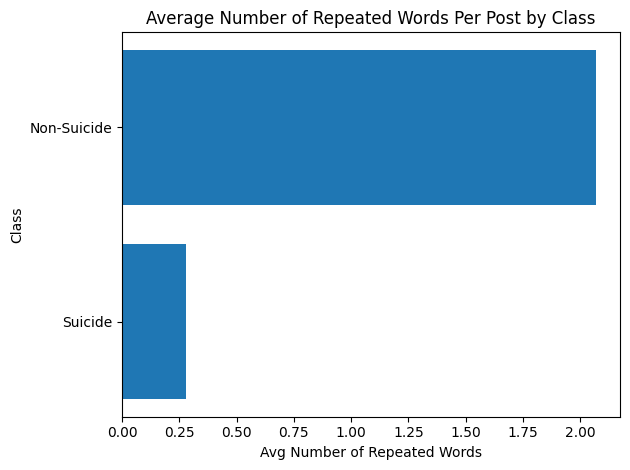

In [ ]:
plt.barh(['Suicide', 'Non-Suicide'], [df['repetition'][df['class'] == 'suicide'].mean(), df['repetition'][df['class'] != 'suicide'].mean()])
plt.title('Average Number of Repeated Words Per Post by Class')
plt.ylabel('Class')
plt.xlabel('Avg Number of Repeated Words')

plt.tight_layout()
plt.savefig('Repeated_words_by_class.png')

In [ ]:
print(len(df[df['repetition'] == 0]) / len(df))

0.9297379284193835


In [ ]:
df_rep = df[df['repetition'] != 0]

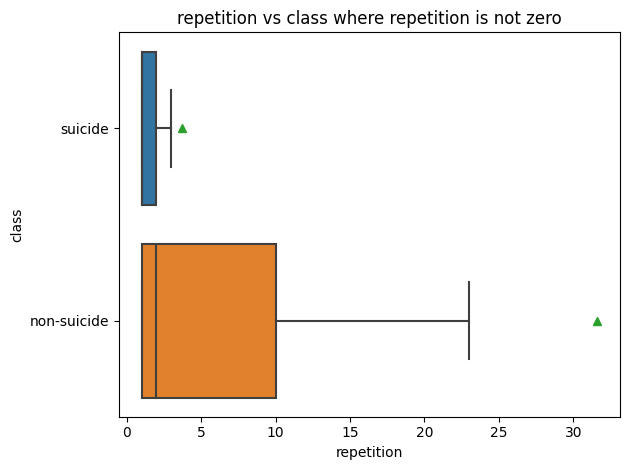

In [ ]:
sns.boxplot(x = 'repetition', y = 'class', data = df_rep, showmeans = True, showfliers = False)
plt.title('repetition vs class where repetition is not zero')

plt.tight_layout()
plt.savefig('Repetition_v_class.png')

In [ ]:
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] != 'suicide']

stats.ttest_ind(df_non_suicide['repetition'].astype(float), df_suicide['repetition'].astype(float))


Ttest_indResult(statistic=8.891072651664192, pvalue=6.094081009352599e-19)

# Step 8:  Vocabulary - Most Frequent Words

In [ ]:
suicide_words = df_suicide['clean_text']
non_suicide_words = df_non_suicide['clean_text']

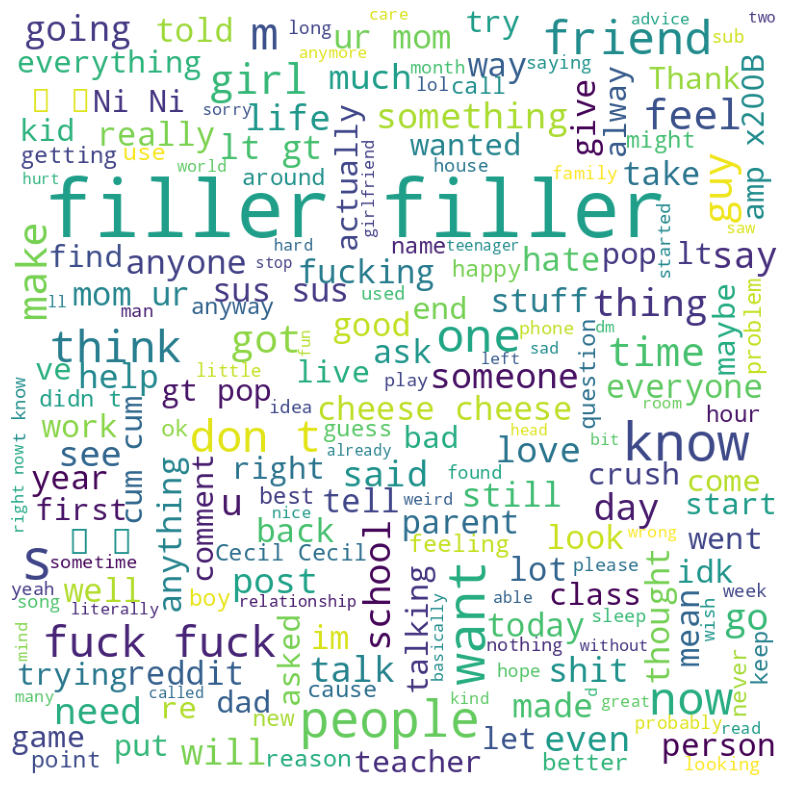

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
lsit2n = ['𒐫','”', '“']

for val in df['clean_text'][df['class'] != 'suicide']:
    
    val = str(val)
    tokens = val.split()  
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.update(lsit2n),
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Non_Suicide_Word_Cloud_Frequency.png')

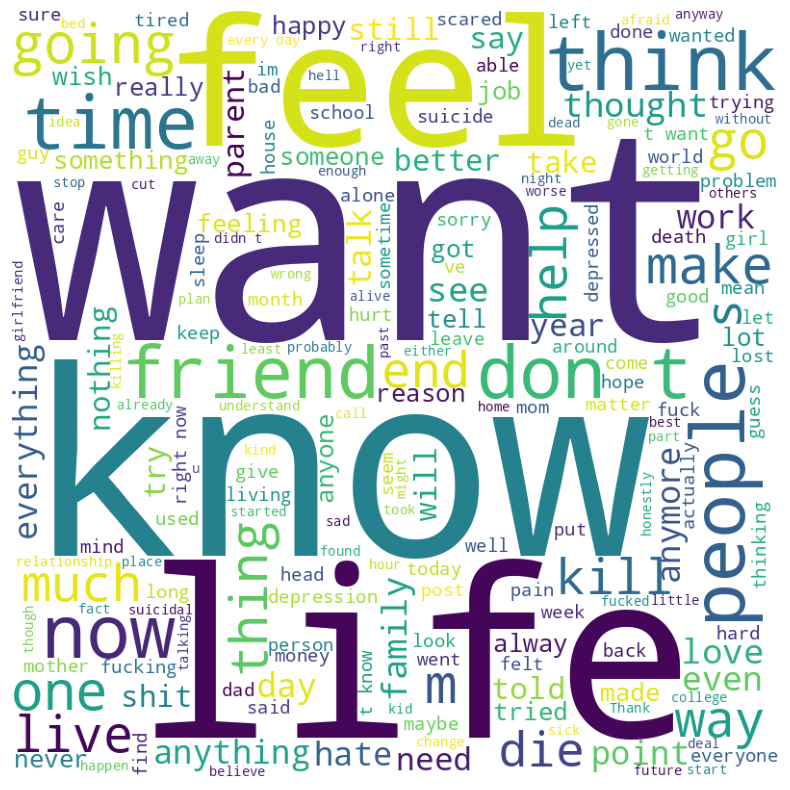

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df['clean_text'][df['class'] == 'suicide']:
    val = str(val)
    tokens = val.split()   
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_Frequency.png')

# Step 9:  Most Predictive Words

### First using Naive Bayes

In [ ]:
df['clean_text'].fillna("abcdefg", inplace = True)

In [ ]:
df.head()

,Unnamed: 0,clean_text,class,length,sentiment,flesch_kincaid,repetition
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715,0.071429,7.7,0
1,3,Am I weird I don't get affected by compliments...,non-suicide,138,0.1,11.5,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129,-0.525,3.1,0
3,8,i need helpjust help me im crying so hard,suicide,41,-0.245833,0.9,0
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426,-0.12841,8.6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      232074 non-null  int64 
 1   clean_text      232074 non-null  object
 2   class           232074 non-null  object
 3   length          232074 non-null  object
 4   sentiment       232074 non-null  object
 5   flesch_kincaid  232074 non-null  object
 6   repetition      232074 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.4+ MB


In [ ]:
df_samp = df.head(200000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create term-document matrix2with CountVectorizer
vectorizer = CountVectorizer(min_df=60)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']


# Train a predictive model on the matrix
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [ ]:
#  Create an identity matrix the length of the vocabulary
from scipy.sparse import identity

x = np.eye(X.shape[1])


In [ ]:
# Use your model to predict on the identity matrix and get a list of probabilities for each word.
words = np.array(vectorizer.get_feature_names_out())


probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)


good_words = words[ind[:25]]
bad_words = words[ind[-25:]]

good_prob = probs[ind[:25]]
bad_prob = probs[ind[-25:]]

print("Suicide words\t     P(suicide | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Teenage words\t     P(suicide | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
    


Suicide words	     P(suicide | word)
            anymorei 1.00
             myselfi 1.00
                diei 1.00
               helpi 1.00
               lifei 0.99
                 mei 0.99
                 iti 0.99
            suicidei 0.99
               donei 0.99
               thisi 0.99
              tiredi 0.99
              fiance 0.99
              againi 0.99
            tonighti 0.99
            retarded 0.99
               herei 0.99
               timei 0.99
              benzos 0.99
                outi 0.99
           suicidali 0.98
              todayi 0.98
           thoughtsi 0.98
              alonei 0.98
               livei 0.98
                endi 0.98
Teenage words	     P(suicide | word)
                 owo 0.00
                snoo 0.00
                 gle 0.00
             preview 0.00
                jojo 0.00
              kahoot 0.00
          rickrolled 0.00
                icon 0.00
                bonk 0.00
                 pfp 0.00
            rick

In [ ]:
suicide_d = {good_words[i]: good_prob[i] for i in range(len(good_words))}

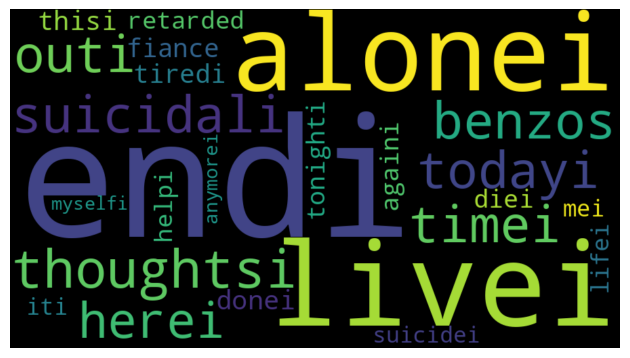

In [ ]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_Predictive.png')

In [ ]:
non_suicide_d = {bad_words[i]: bad_prob[i] for i in range(len(bad_words))}

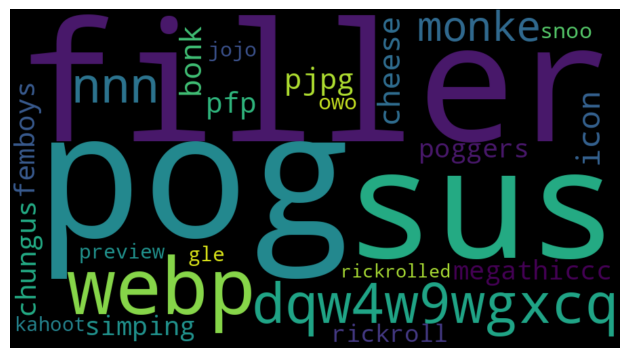

In [ ]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(non_suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('Non_suicide_Word_Cloud_Predictive.png')

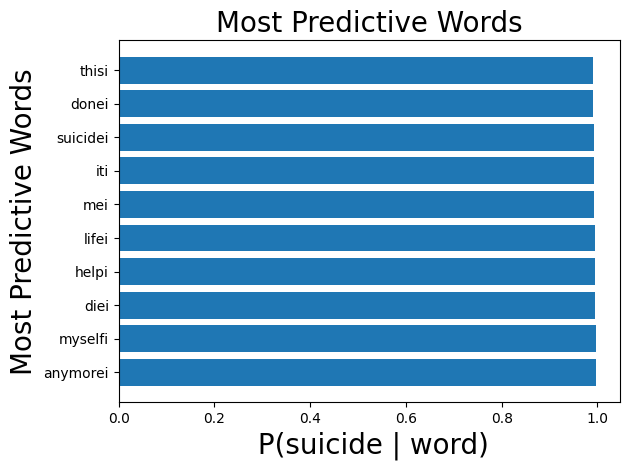

In [ ]:
plt.barh(good_words[:10], 1 - np.exp(good_prob[:10]))
plt.rcParams.update({'figure.figsize': (2.5, 2.0)})
plt.xlabel(' P(suicide | word)', fontsize=20)
plt.ylabel('Most Predictive Words', fontsize=20)
plt.title('Most Predictive Words', fontsize=20)

plt.tight_layout()
plt.savefig('Most_predictive_words_bar_chart.png')

In [ ]:
# The remainder of this notebook is used to analyze posts that include some of the most predictive words.  

In [ ]:
for i in range(0, 60000):
    if 'ativan ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 764:  ativan and alcoholhow's 200 mg of ativan and a lot of. alcohol,, will it kill me
----------------------------------------------------------------------------------------------------
 
iteration 7001:  It's been quite some time.Hi reddit.  I find myself in a headspace I thought I had left behind.  I'm on the other side of a meltdown/ panic attack or whatever and I feel exhausted.  I'm drained but cant sit still.  I feel frozen to inaction but feel an unstoppable need to change something. 

My thoughts all focus on not wanting this anymore.  I'm so tired of the struggle.  Struggle to pay Bill's, stay groomed, keep the place clean, car, insurance, social life, work, dad time, sleep.  Everything is a struggle.  Nothing feels smooth or easy going.

It's all so hopeless.  I've been so lonely since my wife left.  I just had my first rejection post divorce and it hurt me way more than I expected.   I was foolish to think I'd be stronger for what I went through.  

The ativan ar

In [ ]:
for i in range(0, 60000):
    if 'xpost ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 4862:  Terrified I'll die after Christmas, but I don't want to (xpost from /r/offmychest)A few of the commenters on /r/offmychest when I posted this there directed me to here. All help is welcome. 

I'm at a loss of what to do. I just am very tired of failing after trying so hard all the time. People say if you fall off the horse, just get back on, but at what point do you realize that maybe you're not made for riding horses. I'm just not good at dealing with people. I can't deal with women anymore. I've continually failed, and been rejected. I've tried to change seemingly everything. Worked out, and gotten in shape. I have a good job that makes good money. I try to be supportive while still being my own person. I used to have confidence but a string of unfaithful partners destroyed that. I just don't know what to do. I have loyal friends and good parents, but I no one ever loves me (in a romantic sense). I don't want to die, but I've just lost motivation to keep going. I've 

In [ ]:
for i in range(0, 6000):
    if 'ideation ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 99:  2929


That’s the oldest I’ve ever been. It’s the oldest I’m ever meant to be.


I don’t remember when I had the first dream. It probably happened when I was so young that I wouldn’t even be able to remember. They are always fragmented and real… Real in the way that when it ends, your eyes open and you’re lying in bed wondering.


“Did I just wake up… or just fall asleep.”


The fragments don’t seem to follow a timeline; just clips like a hazy recollection of a night out. Remembering moments out of a long series of events.


In these dreams, I’ve seen the events of my life, tragic and wonderful, play out before me. Sometimes months or years before they are experienced in the chronological timeline.


It took time to get used to having these dreams; especially the dark ones, the ones where a friend or family member passes and I’m forced to spectate as a silent observer in their final moments. It wasn’t until my teens that I felt like I understood what they were. As stupid

In [ ]:
for i in range(0, 6000):
    if 'dbt ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 1005:  I’m never enough.I think I’m gonna try again. I can’t do this anymore. I’m inadequate. In school I was the weird kid no one wanted to fw. I ate lunch in the girls bathroom the majority of 8th grade. In high school I attempted suicide multiple times, one of the attempts landing me in a coma for 3 days. But I’ve been to the psych ward countless times. I’ve been to dbt therapy, cbt, and I’ve tried so hard to get better but I can’t. It ain’t my life because I have a pretty decent life. I live in the US, am a sophomore in college, and despite my families money issues, my parents have parented me to the best of their abilities. It’s just me. I am never enough as I am. I don’t fit in with people, and no one will ever love me enough to marry me. I’m pretty, but my personality sucks so much I don’t see why anyone would ever want me. And even if there was a possibility I’m done with hope. Whenever I have hope, I get hurt in the end because I expected too much.  Sorry I just need

In [ ]:
for i in range(0, 6000):
    if 'retarded ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 254:  How do I give support for someone I'm growing to despise?Little background: Few years ago my parents got a divorce and my mom began a (somewhat abusive) relationship with someone. Last year my dad died.

Shortly before my dad's funeral it became evident to my mom that she was being cheated on and the dude was going to leave her. So at our dad's funeral my mom was crying, not because her ex-husband had died but, because her boyfriend had left her (I know that my parents marriage had ended and she didn't need to feel bad about it, but to me it was extremelly disrespectful to me and my siblings --- at the moment nobody knew why she was so sad). Few days later, we were stil mourning our dad's death and the reason for her sadness showed up...

Now because her boyfriend have left her she is treatning to kill herself. Jesus Christ, My 50 years old mother is treatning to kill herself because her 36 years old boyfriend have left her!

She became insuferable, her facebook is fill

In [ ]:
for i in range(0, 16000):
    if 'wellbutrin ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 3745:  3 weeks ago today I was in psych ward.3 weeks ago today I woke up in a psych ward on a 72 hour hold for putting a gun to my head on 2 separate occasions. I broke down and told a social worker at my place of employment who's a friend and the cops were called without me knowing and they braught me in. When asked why I didnt shoot myself, I responded with because I'm a pussy. Just posting this to let you all know shit can get better. I deal with suicidal thoughts everyday all day. But there is resources that can help you get out of the rut a little. I'm on wellbutrin and hydroxyzine. So far it doesn't seem to be doing much. But I have hope I guess.
----------------------------------------------------------------------------------------------------
 
iteration 4742:  Feeling scared &amp; aloneIm NOT stable rn. I just self harmed, im covered in blood, i just took 1200 mg of wellbutrin with 3 shots of tequila. Im useless. Idk what to do 
-------------------------------------

In [ ]:
for i in range(0, 56000):
    if 'platitude ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 5681:  I don't just want to die to stop hurting. I want to die to punish everyone around me. Including you.I want my dad to find my asphyxiated corpse in the garage after he gets home from the Christmas party.  That's what he gets for constantly calling me ungrateful, criticizing me and telling me that I can't do anything right.

Then I want him to call my ex-wife, who left me and took my children, right when I needed them most.  When I hit rock bottom, she had a responsibility to help me through it.  Instead she bailed, and encouraged my kids to stop talking to me.  When she calls she lumps on shitty platitude after shitty platitude about why I should keep going, then she proceeds to ignore me or engage me in any meaningful conversation about us, or what she's done to hurt me over 15 years of our sham of a marriage.

I want to punish my gossipy neighbors for spreading rumors about me.  Let them be the eons who now have to spend years consoling my dad over this, and let them 

In [ ]:
for i in range(0, 16000):
    if 'faggot ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 874:  I just need someone to listen to me...Back story: I'm 18, I've been suffering from depression for 3 or 4 years but I don't want to go back to the doctor because I'm scared that they won't take me seriously and think I'm just another teenager. I have never talked about my problems to anyone else because when I try I freeze and am unable to say anything. Over the past couple of years, I have tried to kill myself over 20 times including pills and alcohol and trying to drown myself. 

Now to my current problems:

I came out at gay when I finished my GCSE's at 16. All my friends said they didn't care and all but within 2 months, I only had 2 or 3 friends that would still talk to me. When I went back to the school to pick up my GCSE certificates, about 100 people, all my old friends and classmates included, started shouting insults like faggot and queer, right up until I was 5 minutes down the road and couldn't hear them any more. My best friend at the time stopped talking to

In [ ]:
for i in range(0, 16000):
    if 'benzos ' in df['clean_text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 1328:  my life has become a nightmareTnis will be a long read but I'm very grateful for those who will read it. I'm going to start this off by saying I've never been a happy person. I've always seeked solace in philosophy &amp; drugs. I've done numerous drugs to try and help me. LSD, shrooms, tons of benzos &amp; opiates, MDMA, but they always only help temporarily. I've been depressed. Always. I can't remember the last time I was happy. I can't remember the way I was before it ever came into my life. But life somehow started looking up for me, I had a well paying job, drugs, close friends, a girlfriend, a car, and just my freedom. I had everything I've ever wanted in life. I wasn't happy but I was content and had a hope for my future.

Until two weeks ago where I made the worst decison of my life ; that was driving when I was fucked up. I was coming home from a day filled with popping pills and smoking with friends, &amp; I made the most selfish, stupid decision of driving u

In [ ]:
for i in range(0, 16000):
    if 'fiance ' in df['clean_text'].iloc[i]:
        print('iteration ' + str(i) + ':  ' + df['clean_text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")
        

iteration 1369:  I fail at lifeYeah. That's it. I mean, I've got some legit issues. PTSD, anxiety disorder. I'm on meds. I'm in therapy. But I have my kids' stepmom telling them that she's their real mom and that they should tell me not to come to school activities because she's coming instead...I make a fool of myself in front of people on a regular basis because apparently I have no capacity for interacting with others...my fiance thinks I'm an incompetent idiot...I can't leave because of my kids, right? that's what they say. But they're already being brainwashed into thinking I'm not as important as their stepmom. I'm trying to assemble the suicide bag thingy and I can't figure out the valve...I fail at this, too. 
----------------------------------------------------------------------------------------------------
 
iteration 1832:  ive got nothing leftpast few years have been rough,had my dad ,uncle and grandad die then my fiance deported not long after
my depression all the while 

# Step 10:  Save Cleaned File

In [ ]:
df.to_csv('Suicide_Detection_Cleaned.csv')